In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/dataset/prep_hasil.csv")
display(data)

,full_text,cleansing,Tokenization and Case Folding,stopword removal,stemming_data
0,APPI Sebut Kredit Kendaraan Listrik Masih Keci...,APPI Sebut Kredit Kendaraan Listrik Masih Keci...,"['appi', 'sebut', 'kredit', 'kendaraan', 'list...","['appi', 'kredit', 'kendaraan', 'listrik', 'ya']",appi kredit kendara listrik ya
1,Lagi pula kita lagi pelan2 migrasi ke kendaraa...,Lagi pula kita lagi pelan migrasi ke kendaraan...,"['lagi', 'pula', 'kita', 'lagi', 'pelan', 'mig...","['pelan', 'migrasi', 'kendaraan', 'listrik', '...",pelan migrasi kendara listrik cadang minyak bu...
2,ABeam Consulting Indonesia Terbitkan Laporan u...,ABeam Consulting Indonesia Terbitkan Laporan u...,"['abeam', 'consulting', 'indonesia', 'terbitka...","['abeam', 'consulting', 'indonesia', 'terbitka...",abeam consulting indonesia terbit lapor tingka...
3,"Kendaraan Listrik Tetap Keluarkan Emisi, Kok B...",Kendaraan Listrik Tetap Keluarkan Emisi Kok Bisa,"['kendaraan', 'listrik', 'tetap', 'keluarkan',...","['kendaraan', 'listrik', 'keluarkan', 'emisi']",kendara listrik keluar emisi
4,Mendag @ZUL_Hasan mengajak para produsen kenda...,Mendag ZULHasan mengajak para produsen kendara...,"['mendag', 'zulhasan', 'mengajak', 'para', 'pr...","['mendag', 'zulhasan', 'mengajak', 'produsen',...",mendag zulhasan ajak produsen kendara listrik ...
...,...,...,...,...,...
637,@MiningIndonesia Yuk bisa yukkk kita bikin ken...,MiningIndonesia Yuk bisa yukkk kita bikin kend...,"['miningindonesia', 'yuk', 'bisa', 'yukkk', 'k...","['miningindonesia', 'yuk', 'yukkk', 'bikin', '...",miningindonesia yuk yukkk bikin kendara listri...
638,@MiningIndonesia Semoga target pencapaian Indo...,MiningIndonesia Semoga target pencapaian Indon...,"['miningindonesia', 'semoga', 'target', 'penca...","['miningindonesia', 'semoga', 'target', 'penca...",miningindonesia moga target capai indonesia be...
639,@MiningIndonesia wahhh keren banget si MIND ID...,MiningIndonesia wahhh keren banget si MIND ID ...,"['miningindonesia', 'wahhh', 'keren', 'banget'...","['miningindonesia', 'wahhh', 'keren', 'banget'...",miningindonesia wahhh keren banget si mind id ...
640,Indonesia siap suply baterai Kendaraan Listrik...,Indonesia siap suply baterai Kendaraan Listrik...,"['indonesia', 'siap', 'suply', 'baterai', 'ken...","['indonesia', 'suply', 'baterai', 'kendaraan',...",indonesia suply baterai kendara listrik trend...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      642 non-null    object
 1   cleansing                      642 non-null    object
 2   Tokenization and Case Folding  642 non-null    object
 3   stopword removal               642 non-null    object
 4   stemming_data                  642 non-null    object
dtypes: object(5)
memory usage: 25.2+ KB


In [5]:
df = pd.DataFrame(data['stemming_data'])
display(df)

,stemming_data
0,appi kredit kendara listrik ya
1,pelan migrasi kendara listrik cadang minyak bu...
2,abeam consulting indonesia terbit lapor tingka...
3,kendara listrik keluar emisi
4,mendag zulhasan ajak produsen kendara listrik ...
...,...
637,miningindonesia yuk yukkk bikin kendara listri...
638,miningindonesia moga target capai indonesia be...
639,miningindonesia wahhh keren banget si mind id ...
640,indonesia suply baterai kendara listrik trend...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [7]:
stemming_data = df['stemming_data']

In [8]:
stemming_data.isnull().sum()

0

In [9]:
stemming_data = stemming_data.fillna('tidak ada komentar')

In [10]:
# Initialize CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer to the data
term_fit = cv.fit(stemming_data)

# Correctly access the vocabulary_ attribute
print(len(term_fit.vocabulary_))

1723


In [11]:
term_fit.vocabulary_

{'appi': 81,
 'kredit': 843,
 'kendara': 771,
 'listrik': 916,
 'ya': 1706,
 'pelan': 1174,
 'migrasi': 1006,
 'cadang': 274,
 'minyak': 1021,
 'bumi': 259,
 'indonesia': 607,
 'udh': 1633,
 'abis': 2,
 'klo': 805,
 'gimana': 504,
 'hrs': 569,
 'impor': 598,
 'mahal': 940,
 'biaya': 220,
 'trs': 1613,
 'lu': 930,
 'orang': 1126,
 'msh': 1049,
 'subsidi': 1479,
 'uang': 1627,
 'ngutang': 1089,
 'protes': 1272,
 'tarik': 1530,
 'mau': 983,
 'abeam': 1,
 'consulting': 311,
 'terbit': 1562,
 'lapor': 885,
 'tingkat': 1583,
 'guna': 527,
 'sabtu': 1351,
 'wib': 1691,
 'keluar': 761,
 'emisi': 419,
 'mendag': 994,
 'zulhasan': 1721,
 'ajak': 35,
 'produsen': 1262,
 'tiongkok': 1584,
 'produksi': 1261,
 'negosiasidagang': 1074,
 'ayodagang': 114,
 'zulhas': 1720,
 'rayu': 1313,
 'china': 296,
 'temu': 1552,
 'chongqing': 298,
 'kait': 723,
 'industri': 616,
 'peluang': 1177,
 'inovasi': 627,
 'ekonomi': 402,
 'negara': 1069,
 'bambangsuwarso': 137,
 'indonesiachina': 608,
 'energiterbarukan':

In [12]:
#kolom pertama jumlah dokumen
#kolom kedua jumlah kata
#kolom ketiga hasil tf

term_freq_all = term_fit.transform(stemming_data)
print(term_freq_all)

  (0, 81)	1
  (0, 771)	1
  (0, 843)	1
  (0, 916)	1
  (0, 1706)	1
  (1, 2)	2
  (1, 220)	1
  (1, 259)	1
  (1, 274)	1
  (1, 504)	1
  (1, 569)	1
  (1, 598)	1
  (1, 607)	1
  (1, 771)	1
  (1, 805)	1
  (1, 916)	1
  (1, 930)	2
  (1, 940)	1
  (1, 983)	1
  (1, 1006)	1
  (1, 1021)	1
  (1, 1049)	1
  (1, 1089)	1
  (1, 1126)	2
  (1, 1174)	1
  :	:
  (640, 771)	1
  (640, 850)	2
  (640, 851)	1
  (640, 852)	1
  (640, 916)	1
  (640, 1372)	1
  (640, 1373)	1
  (640, 1495)	1
  (640, 1574)	1
  (640, 1608)	1
  (641, 19)	1
  (641, 288)	1
  (641, 416)	1
  (641, 607)	1
  (641, 771)	1
  (641, 916)	1
  (641, 1015)	1
  (641, 1019)	1
  (641, 1039)	1
  (641, 1104)	1
  (641, 1142)	1
  (641, 1315)	1
  (641, 1594)	1
  (641, 1630)	1
  (641, 1694)	1


In [13]:
stemming_tf=stemming_data[0]
print(stemming_tf)

appi kredit kendara listrik ya


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df is your dataframe and 'stemming_data' is the column with stemmed text
corpus = df['stemming_data'].tolist()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 1706)	0.4566886391748989
  (0, 916)	0.09460956511449846
  (0, 771)	0.09460956511449846
  (0, 843)	0.6024294745816945
  (0, 81)	0.6407903521289109
  (1, 983)	0.17597709672275727
  (1, 1530)	0.0974999381374854
  (1, 1272)	0.35195419344551454
  (1, 1089)	0.16544223795644067
  (1, 1627)	0.17597709672275727
  (1, 1479)	0.27379583835262583
  (1, 1049)	0.16544223795644067
  (1, 1126)	0.33088447591288134
  (1, 930)	0.35195419344551454
  (1, 1613)	0.17597709672275727
  (1, 220)	0.14342761052319616
  (1, 940)	0.1521698855567498
  (1, 598)	0.16544223795644067
  (1, 569)	0.17597709672275727
  (1, 504)	0.15796763670894617
  (1, 805)	0.17597709672275727
  (1, 2)	0.31593527341789235
  (1, 1633)	0.17597709672275727
  (1, 607)	0.026554116057023295
  (1, 259)	0.14342761052319616
  :	:
  (640, 1373)	0.2660493145942227
  (640, 852)	0.2660493145942227
  (640, 850)	0.5320986291884454
  (640, 851)	0.2660493145942227
  (640, 1608)	0.2660493145942227
  (640, 1495)	0.2660493145942227
  (640, 162)	0.065962

In [17]:
from sklearn.cluster import KMeans

num_clusters = 3  # Change this based on the desired number of clusters (positive, negative, neutral)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)
print(clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 1 0 2 2 2 0 2 2 2 2 2 1 0 0
 2 0 2 2 0 0 1 2 0 2 0 0 2 2 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 2 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 2 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 2 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 

In [18]:
df['sentiment_label'] = clusters

In [19]:
display(df)

,stemming_data,sentiment_label
0,appi kredit kendara listrik ya,2
1,pelan migrasi kendara listrik cadang minyak bu...,2
2,abeam consulting indonesia terbit lapor tingka...,2
3,kendara listrik keluar emisi,2
4,mendag zulhasan ajak produsen kendara listrik ...,2
...,...,...
637,miningindonesia yuk yukkk bikin kendara listri...,2
638,miningindonesia moga target capai indonesia be...,2
639,miningindonesia wahhh keren banget si mind id ...,2
640,indonesia suply baterai kendara listrik trend...,2


In [20]:
# Assuming you have inspected the clusters and assigned labels accordingly
cluster_label_mapping = {0: 'positive', 1: 'negative', 2: 'neutral'}
df['sentiment'] = df['sentiment_label'].map(cluster_label_mapping)

In [21]:
display(df)

,stemming_data,sentiment_label,sentiment
0,appi kredit kendara listrik ya,2,neutral
1,pelan migrasi kendara listrik cadang minyak bu...,2,neutral
2,abeam consulting indonesia terbit lapor tingka...,2,neutral
3,kendara listrik keluar emisi,2,neutral
4,mendag zulhasan ajak produsen kendara listrik ...,2,neutral
...,...,...,...
637,miningindonesia yuk yukkk bikin kendara listri...,2,neutral
638,miningindonesia moga target capai indonesia be...,2,neutral
639,miningindonesia wahhh keren banget si mind id ...,2,neutral
640,indonesia suply baterai kendara listrik trend...,2,neutral


<ipython-input-22-5990b1cfcba7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel' )


<function matplotlib.pyplot.show(close=None, block=None)>

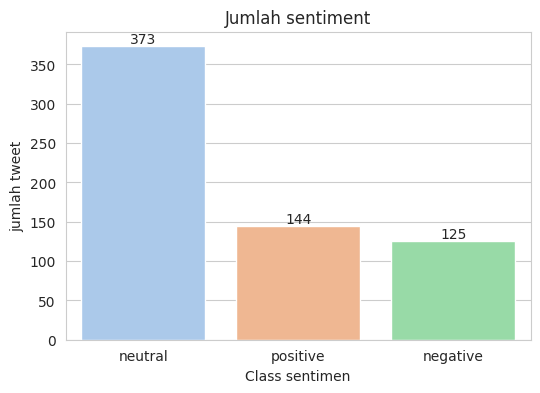

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel' )
plt.xlabel("Class sentimen")
plt.ylabel("jumlah tweet")
plt.title("Jumlah sentiment")

for i, count in enumerate(sentiment_count.values):
  ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe and 'stemming_data' is the column with stemmed text
corpus = df['stemming_data'].tolist()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Assuming 'sentiment' is your target column with labels
y = df['sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
def map_to_label(sentiment_score):
    try:
        # Convert the sentiment_score to a float
        sentiment_score = float(sentiment_score)

        if sentiment_score > 1:
            return 'positive'
        elif sentiment_score < -1:
            return 'negative'
        else:
            return 'neutral'
    except ValueError:
        # Handle the case where sentiment_score is not convertible to a float
        return 'unknown'


In [25]:
!pip install -U scikit-learn
from sklearn.svm import SVC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [26]:

# Assuming X_train and y_train are already defined from the train_test_split
model = SVC(kernel='rbf')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicted_labels = [map_to_label(score) for score in y_pred]


In [27]:
y_pred = model.predict(X_test)
predicted_labels = [map_to_label(score) for score in y_pred]

In [28]:
# Assuming X_test and y_test are already defined from the train_test_split

# Predictions
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.9844961240310077
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.92      0.96        24
     neutral       1.00      1.00      1.00        82
    positive       0.92      1.00      0.96        23

    accuracy                           0.98       129
   macro avg       0.97      0.97      0.97       129
weighted avg       0.99      0.98      0.98       129



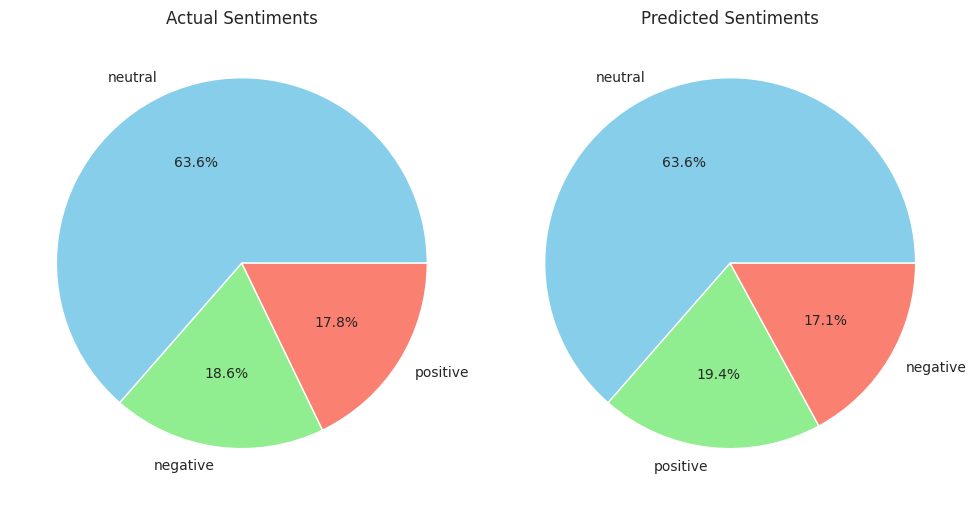

In [29]:
# Create a DataFrame to store the actual and predicted sentiments
data = pd.DataFrame({'Actual Sentiment': y_test, 'Predicted Sentiment': y_pred})

# Count the occurrences of each sentiment
actual_counts = data['Actual Sentiment'].value_counts()
predicted_counts = data['Predicted Sentiment'].value_counts()

# Plot a pie chart for actual sentiments
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Actual Sentiments')

# Plot a pie chart for predicted sentiments
plt.subplot(1, 2, 2)
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Predicted Sentiments')

plt.tight_layout()
plt.show()


Accuracy: 0.9767441860465116


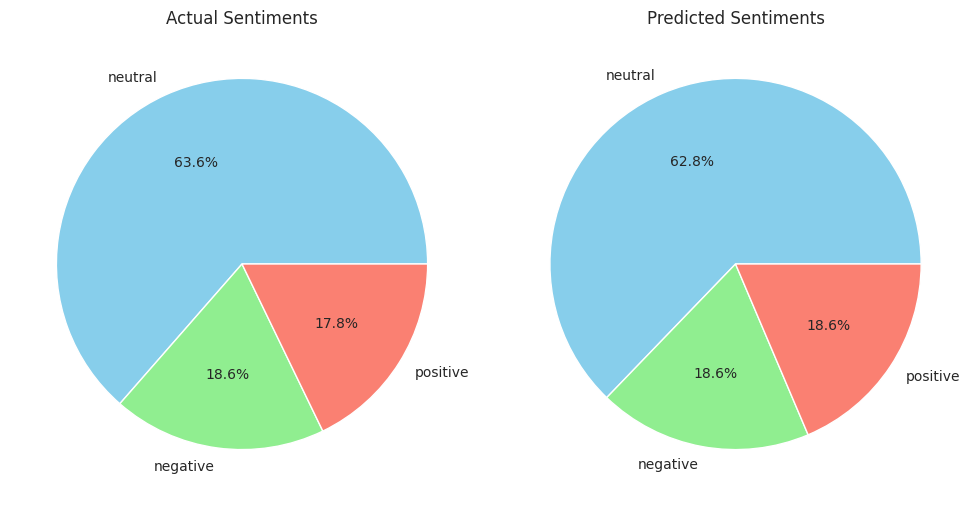

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

class SVMClassifier:
    def __init__(self, kernel='linear'):
        self.model = SVC(kernel=kernel)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return y_pred, accuracy

    def plot_sentiments(self, y_test, y_pred):
        # Create a DataFrame to store the actual and predicted sentiments
        data = pd.DataFrame({'Actual Sentiment': y_test, 'Predicted Sentiment': y_pred})

        # Count the occurrences of each sentiment
        actual_counts = data['Actual Sentiment'].value_counts()
        predicted_counts = data['Predicted Sentiment'].value_counts()

        # Plot a pie chart for actual sentiments
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
        plt.title('Actual Sentiments')

        # Plot a pie chart for predicted sentiments
        plt.subplot(1, 2, 2)
        plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
        plt.title('Predicted Sentiments')

        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming X_train, X_test, y_train, y_test are already defined from the train_test_split

# Initialize the SVM classifier
classifier = SVMClassifier(kernel='linear')

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred, accuracy = classifier.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Plot the sentiments
classifier.plot_sentiments(y_test, y_pred)


Accuracy: 0.9844961240310077
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.92      0.96        24
     neutral       1.00      1.00      1.00        82
    positive       0.92      1.00      0.96        23

    accuracy                           0.98       129
   macro avg       0.97      0.97      0.97       129
weighted avg       0.99      0.98      0.98       129



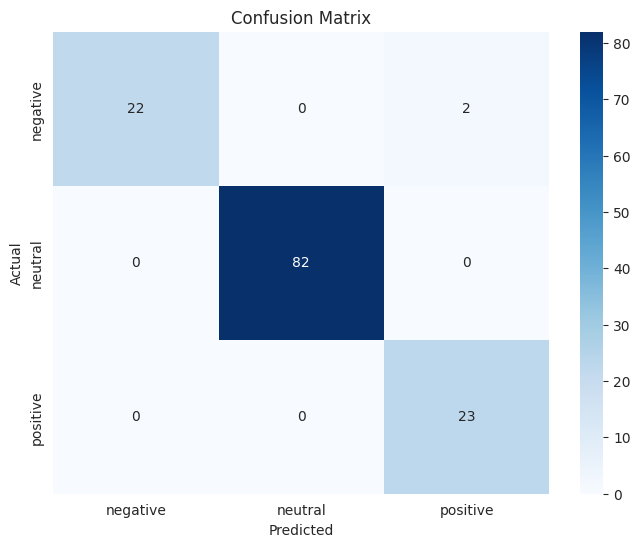

In [31]:
# Assuming X_test and y_test are already defined from the train_test_split

# Predictions
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print accuracy and classification report
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [32]:
display(data)

,Actual Sentiment,Predicted Sentiment
86,neutral,neutral
192,neutral,neutral
479,negative,negative
616,neutral,neutral
72,neutral,neutral
...,...,...
370,negative,negative
177,neutral,neutral
517,negative,negative
511,negative,negative
